<a href="https://colab.research.google.com/github/areeba-droid/ComputerVisionFonts/blob/yuki/ComputerVisionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Object Detection Using YOLO <b> </h1></center>

This tutorial is designed to provide a comprehensive understanding of how to use YOLO, a state-of-the-art method in computer vision, for detecting objects in images.

Object detection and classification is a key technology in many areas, such as automated vehicles, security, and even healthcare.

We will begin with the basics of preparing (pre processing) an image dataset, ensuring it is ready for effective model training.We will then explore how YOLO, a type of convolutional neural network, automatically extracts features from images to recognize different objects. Understanding this process is crucial for grasping how YOLO operates.

The core of this tutorial is focused on transfer learning using YOLO. We will teach you how to take a pre-trained YOLO model and adapt it to a new dataset. This technique is efficient and powerful, allowing us to harness the strengths of YOLO with less computational effort.

By the end of this tutorial, you will have hands-on experience with preparing data, implementing YOLO, and understanding the principles behind it. This tutorial aims to equip students with practical skills and knowledge in one of the most exciting fields in technology.

Since its inception, the YOLO family of object detection models has come a long way. YOLOv8 is the most recent addition to this famous anchor-based single-shot family of object detectors. It comes with a bunch of improvements which include state-of-the-art accuracy and speed.  In this article, we will be fine tuning the YOLOv8 object detection model on a real-world pothole detection dataset.

In the previous lecture, you were asked to make your own custom datasets for a project you want to work on. Today we will explore how to finetune YOLO on a certain dataset.  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing required Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

# Dataset Description






# Data Preprocessing

For preprocessing:
- We have to convert the dataset into that acceptable by YOLO.
  - Heirarchy of folders should be the one accepted by YOLO
  - Labels format should be darknet YOLO.
  - Labels files should be .txt files
- Check and see if there are any missing labels or images. And remove them from dataset.


## Heirarchy of Folders correction

Defining paths to train and test folders.

In [15]:
data_dir = '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images'

In [13]:
test_dir = '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val'
train_dir = '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train'

In [5]:
#set the paths to labels and images directory
# label_dir= "/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels"
image_dir="/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images"

In [ ]:
#get list of all class names and put into an array
classList = os.listdir(data_dir)

classList

['Aladin-Regular',
 'BowlbyOneSC-Regular',
 'Bonbon-Regular',
 'AmaticSC-Regular',
 'AmericanTypewriter-Condensed',
 'CarterOne',
 'BrushScriptMT',
 'BradleyHandITCTT-Bold',
 'AlexBrush-Regular',
 'Allura-Regular',
 'Didot',
 'Chalkduster',
 'CourierNewPSMT',
 'Damion',
 'DancingScript-Bold',
 'GochiHand-Regular',
 'Copperplate',
 'Cookie-Regular',
 'FredokaOne-Regular',
 'Futura-CondensedMedium',
 'HelveticaNeue',
 'GreatVibes-Regular',
 'Noteworthy-Light',
 'Optima-Regular',
 'GrandHotel-Regular',
 'Luminari-Regular',
 'Impact',
 'Helvetica-Bold',
 'Pacifico-Regular',
 'MarkerFelt-Thin',
 'Shojumaru-Regular',
 'RockSalt',
 'Rockwell-Regular',
 'Yesteryear-Regular',
 'TimesNewRomanPSMT',
 'SwankyandMooMoo']

Making directories according to above struture of folders

In [ ]:
#import os
#run it once for making directories

#os.makedirs('/content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/Final_data')
# os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images')
os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train')
# os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val')

In [ ]:
#create folders inside train/test/val to label data
for item in classList:
  os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train/' + item)
  # os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/' + item)

In [ ]:
import os, glob

def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/*/*"):
        file_name=os.path.basename(file)
        font_name=os.path.basename(os.path.dirname(file))
        font_image = (file)
        X.append(font_image)
        y.append(font_name)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{11682} samples',end=' ')
        # print(font_image)
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

In [ ]:
font_image, font_name = load_data()



 Processed 11682/11682 samples 

In [ ]:
font_image

array(['/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/Aladin-Regular/Aladin-Regular$$U0075.00000.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/Aladin-Regular/Aladin-Regular$$U0074U006fU0072.00000.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/Aladin-Regular/Aladin-Regular$$U0074U006fU0066.00000.png',
       ...,
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/SwankyandMooMoo/SwankyandMooMoo$$_2.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/SwankyandMooMoo/SwankyandMooMoo$$_1.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/SwankyandMooMoo/SwankyandMooMoo$$_0.png'],
      dtype='<U149')

In [ ]:
font_name

array(['Aladin-Regular', 'Aladin-Regular', 'Aladin-Regular', ...,
       'SwankyandMooMoo', 'SwankyandMooMoo', 'SwankyandMooMoo'],
      dtype='<U28')

In [ ]:
from sklearn.model_selection import train_test_split

#splitting our data
############# Unscaled test/train set #############
X_train80, X_test, y_train80, y_test = train_test_split(
    font_image,
    font_name,
    test_size=0.2,
    random_state=42
)

# Then further divide the train set into validation
# Note that here, to get 60%-20%, we'll need to divide the 80% train set from above to 75-25 split
# 0.8 * 0.25 = 0.2
# X_train, X_validation, y_train, y_validation = train_test_split(
#     X_train80,
#     y_train80,
#     test_size=0.25,
#     random_state=42
# )

In [ ]:
X_train80

array(['/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/GreatVibes-Regular/GreatVibes-Regular$$U0069U006eU0063.00000.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/DancingScript-Bold/DancingScript-Bold$$U0051.00000.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/HelveticaNeue/HelveticaNeue$$U0054U0069U006d.00000.png',
       ...,
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/Copperplate/Copperplate$$U0074U0068U006f.00000.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/AmaticSC-Regular/AmaticSC-Regular$$U0044U0045U0042.00000.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/Noteworthy-Light/Noteworthy-Light$$U0048U0052U0045.00000.png'],
      dtype='<U149')

In [ ]:
X_test

array(['/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/Helvetica-Bold/Helvetica-Bold$$U0054U0048U0041.00000.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/Futura-CondensedMedium/Futura-CondensedMedium$$U0054U0048U0045.00000.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/AmaticSC-Regular/AmaticSC-Regular$$U0063U006fU0075.00000.png',
       ...,
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/Yesteryear-Regular/Yesteryear-Regular$$U0068U0069U006c.00000.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/TimesNewRomanPSMT/TimesNewRomanPSMT$$U0045.00000.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/DancingScript-Bold/DancingScript-Bold$$U004fU004eU0044.00000.png'],
      dtype='<U149')

In [ ]:
y_train80

array(['GreatVibes-Regular', 'DancingScript-Bold', 'HelveticaNeue', ...,
       'Copperplate', 'AmaticSC-Regular', 'Noteworthy-Light'],
      dtype='<U28')

In [ ]:
y_test

Copy XML files and jpg files from the train folder to the folders created.

In [ ]:
#import shutil
#run it once for copying!
for file in X_train80:
    #going through the training data and forming the directory
    if file.endswith(".png"):
        #'file' is the whole directory
        image = Image.open(file)
        image = image.convert("RGB")
        #just gets the name of the png file
        new_filename = os.path.basename(file)
        #gets the class name of the file
        className = new_filename.split("$$")[0]
        image.save(os.path.join(image_dir,"train", className, new_filename), "PNG")


#Copy png files from the test folder to the folders created.
for file in X_test:
    #going through the training data and forming the directory
    if file.endswith(".png"):
        #'file' is the whole directory
        image = Image.open(file)
        image = image.convert("RGB")
        #just gets the name of the png file
        new_filename = os.path.basename(file)
        #gets the class name of the file
        className = new_filename.split("$$")[0]
        image.save(os.path.join(image_dir,"val", className, new_filename), "PNG")
        # print(os.path.join(image_dir,"val", className, new_filename))


Visualizing somme pictures from the dataset

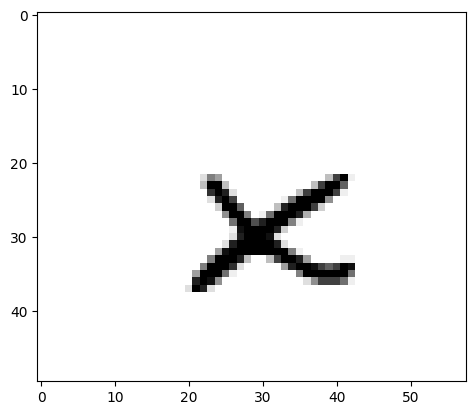

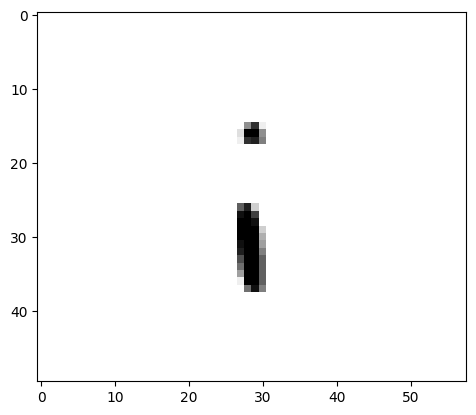

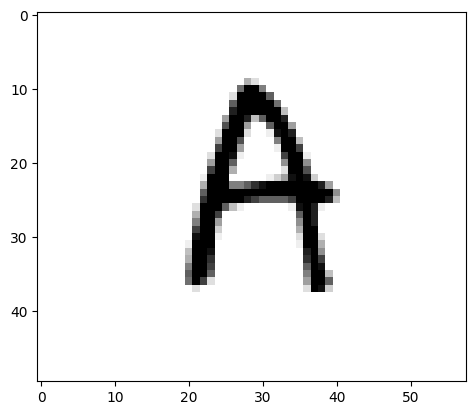

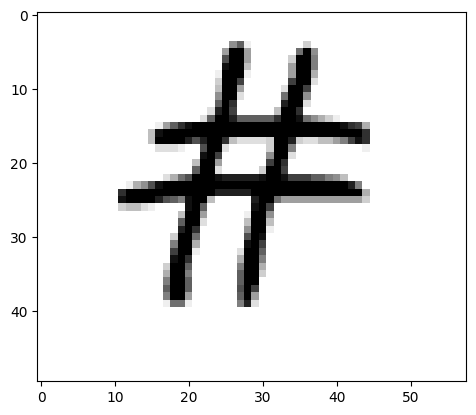

In [8]:
#visualize first four sample images from train data
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train", "SwankyandMooMoo"))):
    img = cv2.imread(os.path.join(image_dir,"train", "SwankyandMooMoo", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

# Custom object classification using YOLO

First install and import

In [9]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [10]:
from ultralytics import YOLO

## Training YOLO

In [11]:
model = YOLO('yolov8s-cls.pt') # pretrained model

100%|██████████| 12.3M/12.3M [00:00<00:00, 253MB/s]


The detailed architecture of the model can be seen from:


In [12]:
model

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [ ]:
model.train(data=data_dir, epochs=3)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images, epochs=3, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

100%|██████████| 5.35M/5.35M [00:00<00:00, 286MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train... 589 images, 0 corrupt:   6%|▋         | 589/9345 [07:07<1:51:29,  1.31it/s]

## Evaluation Metrics

[This](https://docs.ultralytics.com/guides/yolo-performance-metrics/) is a very good detailed explanation of different perfromance metrics in YOLO.

**Choosing the Right Metrics**

Choosing the right metrics to evaluate often depends on the specific application.

- mAP: Suitable for a broad assessment of model performance.

- IoU: Essential when precise object location is crucial.

- Precision: Important when minimizing false detections is a priority.

- Recall: Vital when it's important to detect every instance of an object.

- F1 Score: Useful when a balance between precision and recall is needed.


In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/val.cache... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]


                   all         56        110       0.81      0.731      0.818      0.561
                orange         21         41      0.907      0.756      0.889      0.639
                 apple         22         33      0.835      0.818      0.878       0.69
                banana         21         36       0.69      0.617      0.687      0.355
Speed: 0.4ms preprocess, 20.8ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train22


0.7305194777048175

Showing confusion matrix, that is already stored in detect/train folder

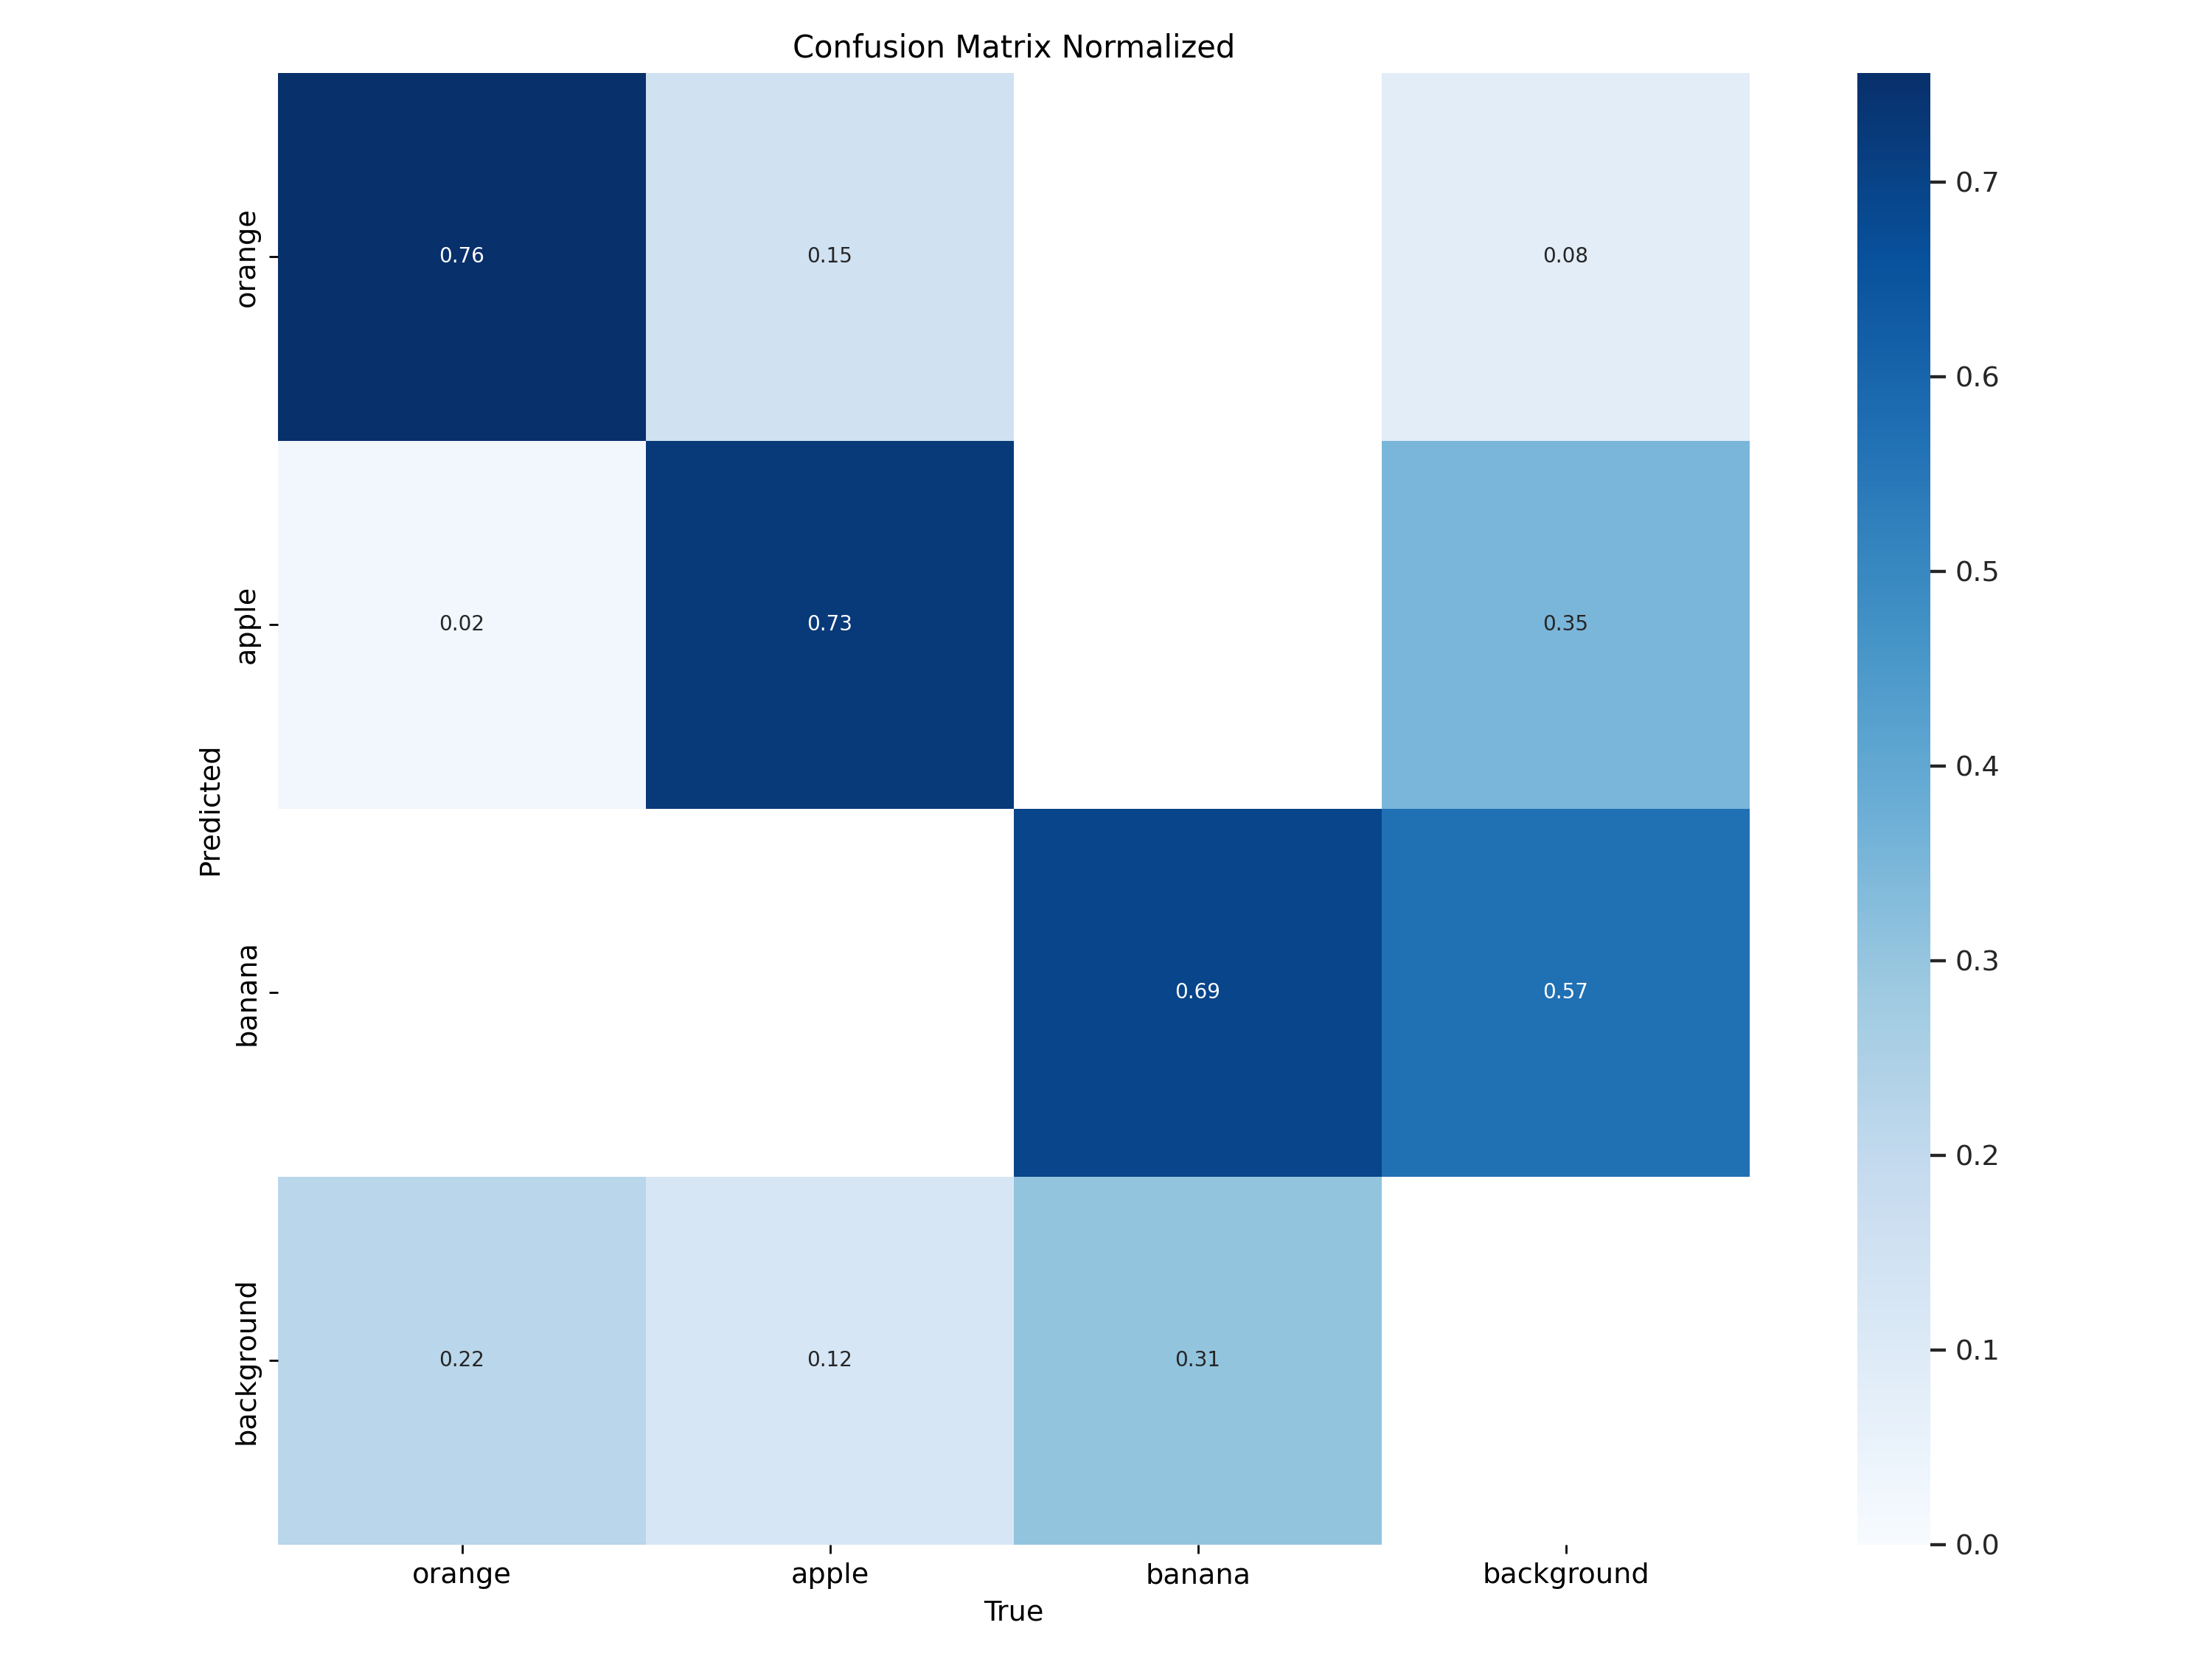

In [ ]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train2/confusion_matrix_normalized.png')

##Prediction

In [ ]:
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('https://www.freshpoint.com/wp-content/uploads/2019/08/freshpoint-produce-101-apples-bananas.jpg', save=True)


Found https://www.freshpoint.com/wp-content/uploads/2019/08/freshpoint-produce-101-apples-bananas.jpg locally at freshpoint-produce-101-apples-bananas.jpg
image 1/1 /content/freshpoint-produce-101-apples-bananas.jpg: 576x640 2 apples, 1 banana, 32.8ms
Speed: 6.0ms preprocess, 32.8ms inference, 7.3ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/detect/predict2


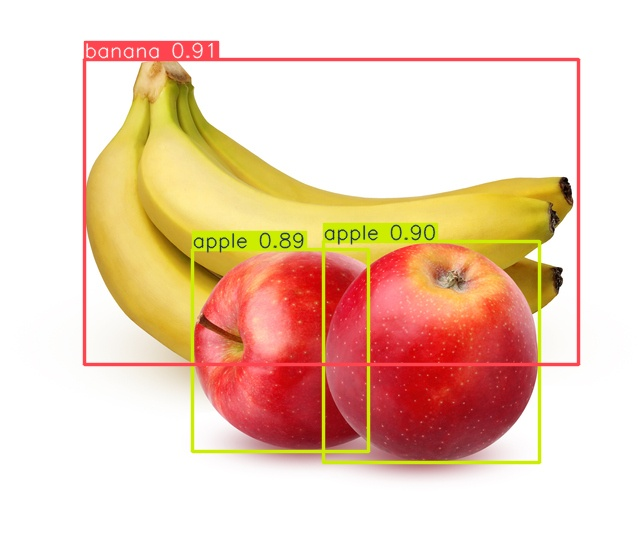

In [ ]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict/freshpoint-produce-101-apples-bananas.jpg')